Software for managing and analysing light curves of variable stars, coming from different surveys.

#### Import libraries

In [1]:
import os

import numpy as np
import pandas as pd

#### Read the data

In [2]:
os.listdir("data")

['kepler_RRLyr.csv', 'lsst_RRLyr.pkl']

In [3]:
LcDatasets = {}
LcDatasets["lsst"] = pd.read_pickle(os.path.join("data", "lsst_RRLyr.pkl"))
LcDatasets["kepler"] = pd.read_csv(os.path.join("data", "kepler_RRLyr.csv"))

In [4]:
# Inspect datasets
LcDatasets["lsst"].head()

,band,ccdVisitId,coord_ra,coord_dec,objectId,psfFlux,psfFluxErr,psfMag,ccdVisitId2,band2,expMidptMJD,zeroPoint
0,y,1032263018,62.462569,-44.11336,1251384969897480052,-515.183603,1697.218490,NaN,1032263018,y,61100.069706,30.602301
1,y,1033987172,62.462569,-44.11336,1251384969897480052,3151.738459,1686.955775,22.653625,1033987172,y,61102.068464,30.606100
2,u,675163080,62.462569,-44.11336,1251384969897480052,183.449123,209.242045,25.741211,675163080,u,60582.247144,30.469101
3,y,443055067,62.462569,-44.11336,1251384969897480052,-704.848327,1624.400086,NaN,443055067,y,60215.203585,30.612801
4,u,466722002,62.462569,-44.11336,1251384969897480052,382.472233,278.926670,24.943500,466722002,u,60261.078221,30.461201


In [5]:
LcDatasets["kepler"].head()

,time,flux,flux_err,quality,timecorr,centroid_col,centroid_row,cadenceno,sap_flux,sap_flux_err,...,psf_centr1,psf_centr1_err,psf_centr2,psf_centr2_err,mom_centr1,mom_centr1_err,mom_centr2,mom_centr2_err,pos_corr1,pos_corr2
0,131.512404,10180609.0,78.926155,128,0.001410,653.372470,51.053028,1105,10129629.0,79.186980,...,NaN,NaN,NaN,NaN,653.372470,0.000006,51.053028,0.000063,0.011782,-0.010195
1,131.532839,10013518.0,78.233770,128,0.001411,653.372292,51.053872,1106,9949931.0,78.459984,...,NaN,NaN,NaN,NaN,653.372292,0.000006,51.053872,0.000062,0.011726,-0.010246
2,131.553273,9852474.0,77.673160,128,0.001412,653.372167,51.044559,1107,9783633.0,77.827200,...,NaN,NaN,NaN,NaN,653.372167,0.000006,51.044559,0.000062,0.011575,-0.010089
3,131.573707,9722936.0,77.109710,128,0.001413,653.371408,51.045081,1108,9651452.0,77.313590,...,NaN,NaN,NaN,NaN,653.371408,0.000006,51.045081,0.000062,0.011366,-0.009939
4,131.594142,9717073.0,77.103550,0,0.001414,653.372167,51.052828,1109,9646289.0,77.262634,...,NaN,NaN,NaN,NaN,653.372167,0.000006,51.052828,0.000062,0.011526,-0.010702


In [6]:
LcDatasets["kepler"].columns

Index(['time', 'flux', 'flux_err', 'quality', 'timecorr', 'centroid_col',
       'centroid_row', 'cadenceno', 'sap_flux', 'sap_flux_err', 'sap_bkg',
       'sap_bkg_err', 'pdcsap_flux', 'pdcsap_flux_err', 'sap_quality',
       'psf_centr1', 'psf_centr1_err', 'psf_centr2', 'psf_centr2_err',
       'mom_centr1', 'mom_centr1_err', 'mom_centr2', 'mom_centr2_err',
       'pos_corr1', 'pos_corr2'],
      dtype='object')

In [7]:
plot_filter_labels = ["u", "g", "r", "i", "z", "y"]

plot_filter_colors = {"u": "#56b4e9", "g": "#008060", "r": "#ff4000",  "i":"#850000","z": "#6600cc","y": "#000000"}
plot_filter_symbols = {"u":"o","g":"^","r":"v","i":"s","z":"*","y": "p"}

In [8]:
LC = LcDatasets["lsst"]["objectId"].unique()[7]
LC = LcDatasets["lsst"][LcDatasets["lsst"]["objectId"] == LC]

In [9]:
bands = {}
for b in plot_filter_labels:
    bands[b] = LC["band"] == b

In [10]:
len(LC)

421

In [12]:
import matplotlib.pyplot as plt

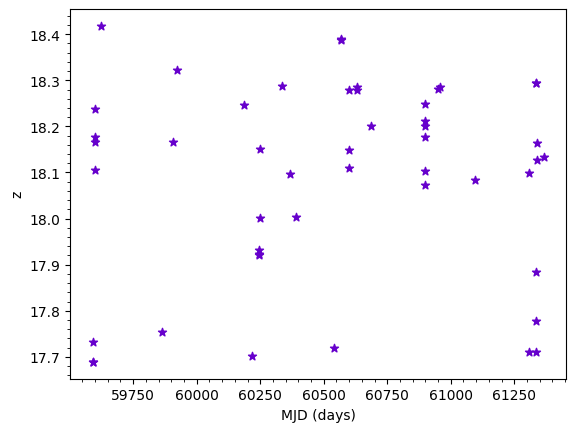

In [17]:
b = "z"
plt.scatter(
    LC[bands[b]]["expMidptMJD"],
    LC[bands[b]]["psfMag"],
    color=plot_filter_colors[b],
    marker=plot_filter_symbols[b]
)
plt.minorticks_on()
plt.xlabel("MJD (days)")
plt.ylabel(b)
plt.show()